In [1]:
import numpy as np
from sklearn.linear_model import Ridge
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
np.random.seed(42)
class1 = np.random.uniform(size=(10, 2))
class2 = np.random.uniform(size=(10, 2)) + 0.3
X_train = np.vstack([class1, class2])
y_train = np.array([0] * 10 + [1] * 10)

In [4]:
def rbf(x, c, h=0.01):
    return np.exp(
        - (x - c) @ (x - c).T
    ) / (h ** 2)

def rbf_vec(x, cs, h=0.1):
    xs = np.repeat(x.reshape(1, -1), 8, axis=0)
    prod = np.diag(((xs - cs) @ (xs - cs).T))
    return np.exp(prod) / h ** 2
    
cs = np.array([
    np.array([.1, .1]),
    np.array([.6, .1]),
    np.array([1, .1]),
    np.array([.1, .6]),
    np.array([.1, .1]),
    np.array([.1, 1]),
    np.array([.6, .6]),
    np.array([1., 1.]),
    np.array([1, .6]),
    np.array([.6, 1]),
])

def rbf_transform(x):
#     x = np.repeat()
    return np.hstack([rbf(x, c=c) for c in cs])

In [5]:
from sklearn.linear_model import LogisticRegression

# X_trans = np.array([rbf_vec(x, cs) for x in X_train])
X_trans = np.array([rbf_transform(x) for x in X_train])

<IPython.core.display.Javascript object>


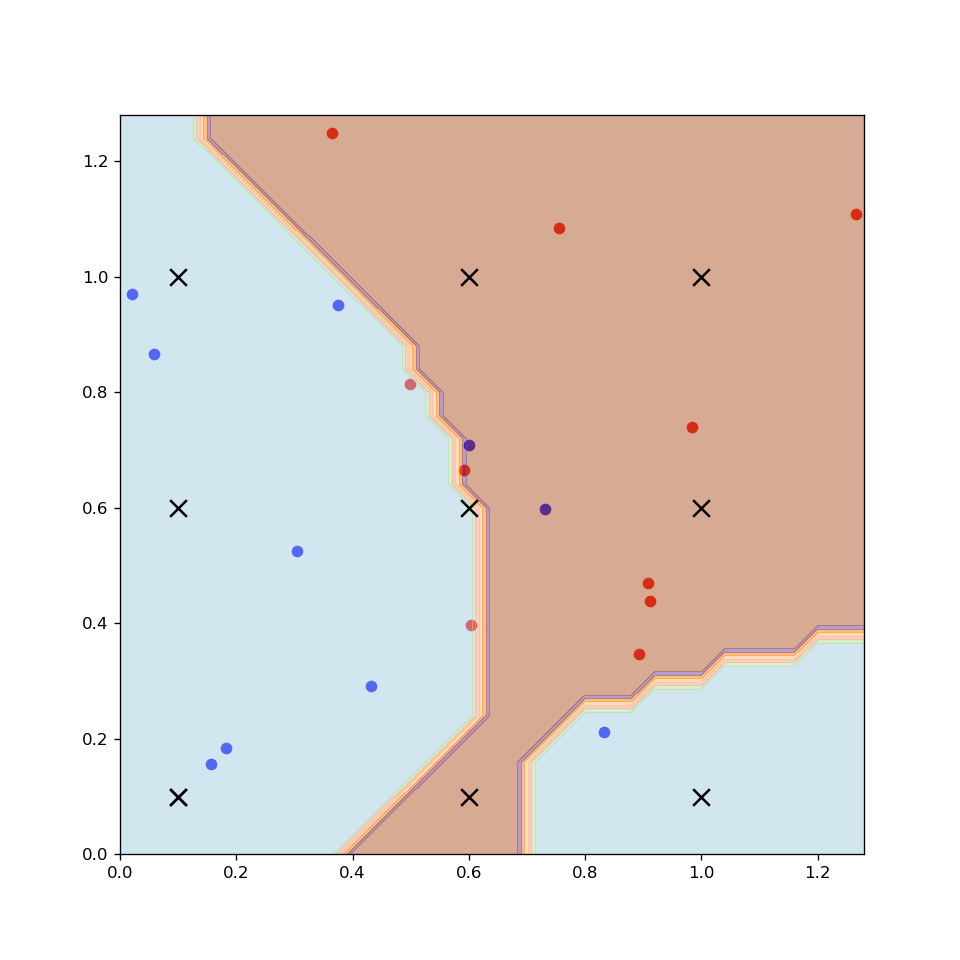

interactive(children=(IntSlider(value=0, description='c', step=5), Output()), _dom_classes=('widget-interact',…

<function __main__.update(c)>

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

aspace = np.logspace(-5, 10, 101)

def update(c):
    fig.clf()
    C = 1. / aspace[c]
    lr = LogisticRegression(solver='liblinear',  C=C, max_iter=20)
    lr.fit(X_trans, y_train)

    xx, yy = np.mgrid[-0:1.3:.04, -0:1.3:.04]
    grid = np.c_[xx.ravel(), yy.ravel()]

    grid = [rbf_transform(x) for x in grid]
#     grid = [rbf_vec(x, cs) for x in grid]
    probs = lr.predict(grid).reshape(xx.shape)

    plt.scatter(class1[:,0], class1[:,1], c='b')
    plt.scatter(class2[:,0], class2[:,1], c='r')
    plt.contourf(xx, yy, probs, cmap=plt.cm.Paired, alpha=0.5)
    
    plt.scatter(cs[:,0], cs[:,1], color='k', marker='x', s=100)
    
    fig.canvas.draw_idle()

interact(update, c=widgets.IntSlider(min=0,max=100,step=5,value=0))